In [189]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
import re
from keras.wrappers.scikit_learn import KerasClassifier
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from nltk import word_tokenize
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [190]:
df = pd.read_csv("data.csv", encoding='latin-1')
alay_dict = pd.read_csv('new_kamusalay.csv', encoding='latin-1', header=None)
id_stopword_dict = pd.read_csv('abusive.csv', header=None)
id_stopword_dict = id_stopword_dict.rename(columns={0: 'stopword'})

In [191]:
df.head()

Tweet  HS  Abusive  \
0  - disaat semua cowok berusaha melacak perhatia...   1        1   
1  RT USER: USER siapa yang telat ngasih tau elu?...   0        1   
2  41. Kadang aku berfikir, kenapa aku tetap perc...   0        0   
3  USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   0        0   
4  USER USER Kaum cebong kapir udah keliatan dong...   1        1   

   HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0              1         0            0        0            0          0   
1              0         0            0        0            0          0   
2              0         0            0        0            0          0   
3              0         0            0        0            0          0   
4              0         1            1        0            0          0   

   HS_Other  HS_Weak  HS_Moderate  HS_Strong  
0         1        1            0          0  
1         0        0            0          0  
2         0        0            0          0  
3         0        0            0          0  
4         0        0            1          0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [7]:
df.describe()

HS       Abusive  HS_Individual      HS_Group   HS_Religion  \
count  13169.000000  13169.000000   13169.000000  13169.000000  13169.000000   
mean       0.422280      0.382945       0.271471      0.150809      0.060217   
std        0.493941      0.486123       0.444735      0.357876      0.237898   
min        0.000000      0.000000       0.000000      0.000000      0.000000   
25%        0.000000      0.000000       0.000000      0.000000      0.000000   
50%        0.000000      0.000000       0.000000      0.000000      0.000000   
75%        1.000000      1.000000       1.000000      0.000000      0.000000   
max        1.000000      1.000000       1.000000      1.000000      1.000000   

            HS_Race   HS_Physical     HS_Gender      HS_Other       HS_Weak  \
count  13169.000000  13169.000000  13169.000000  13169.000000  13169.000000   
mean       0.042980      0.024527      0.023236      0.284000      0.256891   
std        0.202819      0.154685      0.150659      0.450954      0.436935   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      1.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

        HS_Moderate     HS_Strong  
count  13169.000000  13169.000000  
mean       0.129471      0.035918  
std        0.335733      0.186092  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        1.000000      1.000000

In [8]:
df.isnull().sum()

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

In [9]:
df.duplicated().sum()

125

In [10]:
categories = ['HS' ,'Abusive' ,'HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race', 'HS_Physical', 
            'HS_Gender' ,'HS_Other' ,'HS_Weak', 'HS_Moderate' ,'HS_Strong']
df[categories].sum()

HS               5561
Abusive          5043
HS_Individual    3575
HS_Group         1986
HS_Religion       793
HS_Race           566
HS_Physical       323
HS_Gender         306
HS_Other         3740
HS_Weak          3383
HS_Moderate      1705
HS_Strong         473
dtype: int64

In [11]:
for list_columns in ['HS','Abusive' ,'HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race', 'HS_Physical', 
            'HS_Gender' ,'HS_Other' ,'HS_Weak', 'HS_Moderate' ,'HS_Strong']:
    print(df[list_columns].value_counts())

0    7608
1    5561
Name: HS, dtype: int64
0    8126
1    5043
Name: Abusive, dtype: int64
0    9594
1    3575
Name: HS_Individual, dtype: int64
0    11183
1     1986
Name: HS_Group, dtype: int64
0    12376
1      793
Name: HS_Religion, dtype: int64
0    12603
1      566
Name: HS_Race, dtype: int64
0    12846
1      323
Name: HS_Physical, dtype: int64
0    12863
1      306
Name: HS_Gender, dtype: int64
0    9429
1    3740
Name: HS_Other, dtype: int64
0    9786
1    3383
Name: HS_Weak, dtype: int64
0    11464
1     1705
Name: HS_Moderate, dtype: int64
0    12696
1      473
Name: HS_Strong, dtype: int64


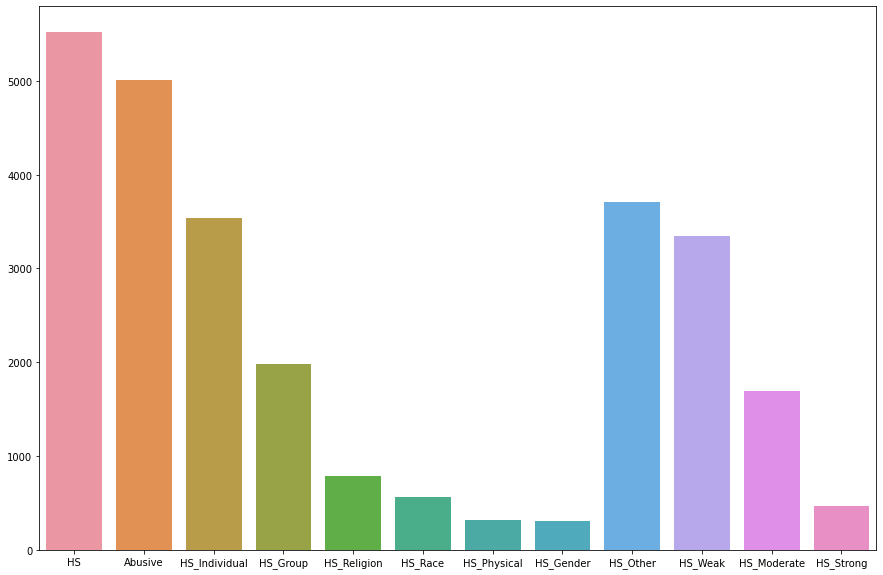

In [118]:
plt.figure(figsize=(15, 10)) 
sns.barplot(x=categories,y=df[categories].sum())
plt.show()

In [1]:
def create_wordcloud(words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, collocations = False, background_color = 'white').generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.savefig('biden_wc.png')
    plt.show()

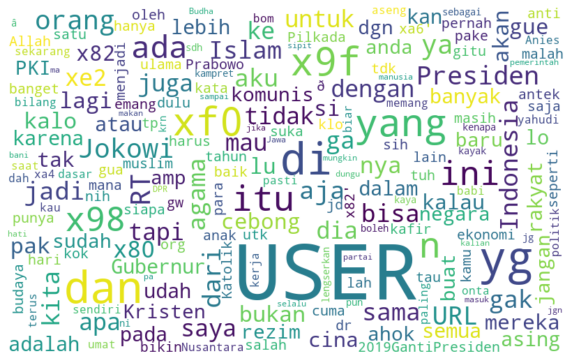

In [14]:
text=df.Tweet.values
words =" ".join(text)
create_wordcloud(words)

Text(0.5, 1.0, 'HS PHYSICAL')

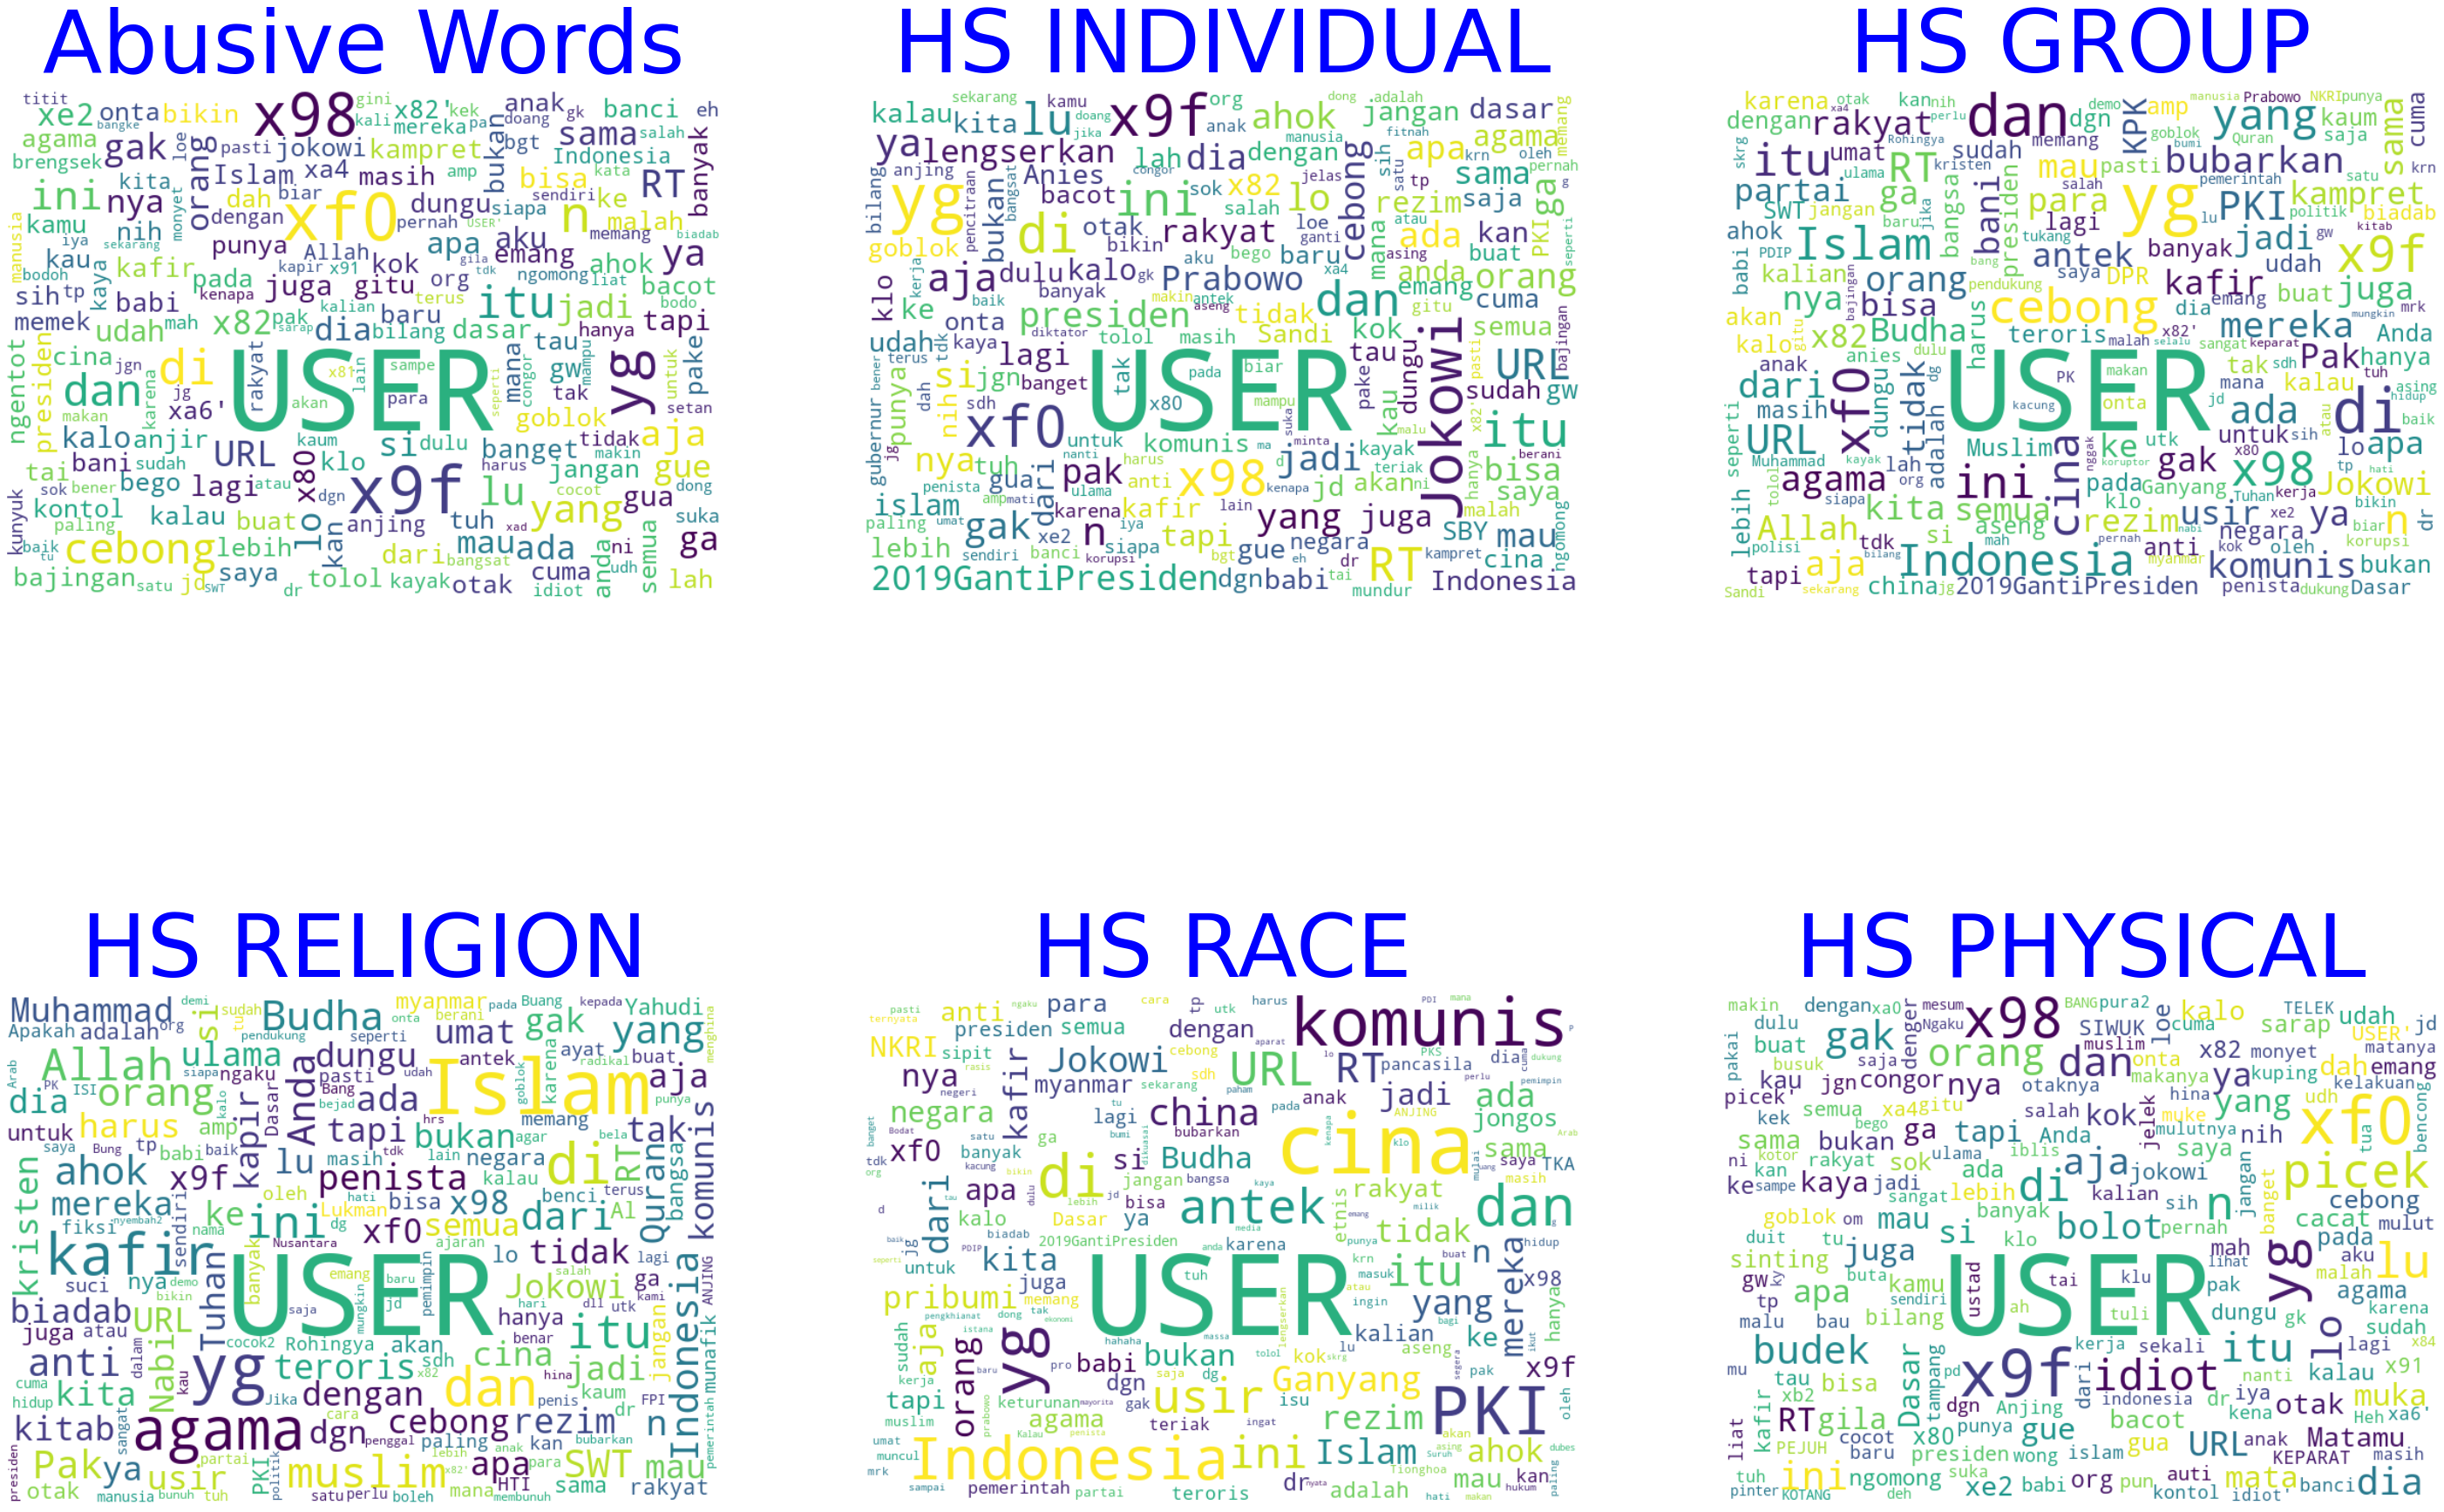

In [16]:
plt.figure(figsize=(50,35))
plt.subplot(2,3,1)
subset = df[df.Abusive==1]
text=subset.Tweet.values
words =" ".join(text)
wordcloud = WordCloud(width=700, height=500, random_state=21, max_font_size=110, collocations = False, background_color = 'white').generate(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Abusive Words', fontdict = {'fontsize' : 100}, color = 'blue')

plt.subplot(2,3,2)
subset= df[df.HS_Individual==1]
text=subset.Tweet.values
words =" ".join(text)
wordcloud = WordCloud(width=700, height=500, random_state=21, max_font_size=110, collocations = False, background_color = 'white').generate(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('HS INDIVIDUAL', fontdict = {'fontsize' : 100}, color = 'blue')

plt.subplot(2,3,3)
subset=df[df.HS_Group==1]
text=subset.Tweet.values
words =" ".join(text)
wordcloud = WordCloud(width=700, height=500, random_state=21, max_font_size=110, collocations = False, background_color = 'white').generate(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('HS GROUP', fontdict = {'fontsize' : 100}, color = 'blue')

plt.subplot(2,3,4)
subset=df[df.HS_Religion==1]
text=subset.Tweet.values
words =" ".join(text)
wordcloud = WordCloud(width=700, height=500, random_state=21, max_font_size=110, collocations = False, background_color = 'white').generate(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('HS RELIGION', fontdict = {'fontsize' : 100}, color = 'blue')

plt.subplot(2,3,5)
subset=df[df.HS_Race==1]
text=subset.Tweet.values
words =" ".join(text)
wordcloud = WordCloud(width=700, height=500, random_state=21, max_font_size=110, collocations = False, background_color = 'white').generate(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('HS RACE', fontdict = {'fontsize' : 100}, color = 'blue')

plt.subplot(2,3,6)
subset=df[df.HS_Physical==1]
text=subset.Tweet.values
words =" ".join(text)
wordcloud = WordCloud(width=700, height=500, random_state=21, max_font_size=110, collocations = False, background_color = 'white').generate(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('HS PHYSICAL', fontdict = {'fontsize' : 100}, color = 'blue')

Text(0.5, 1.0, 'HS STRONG')

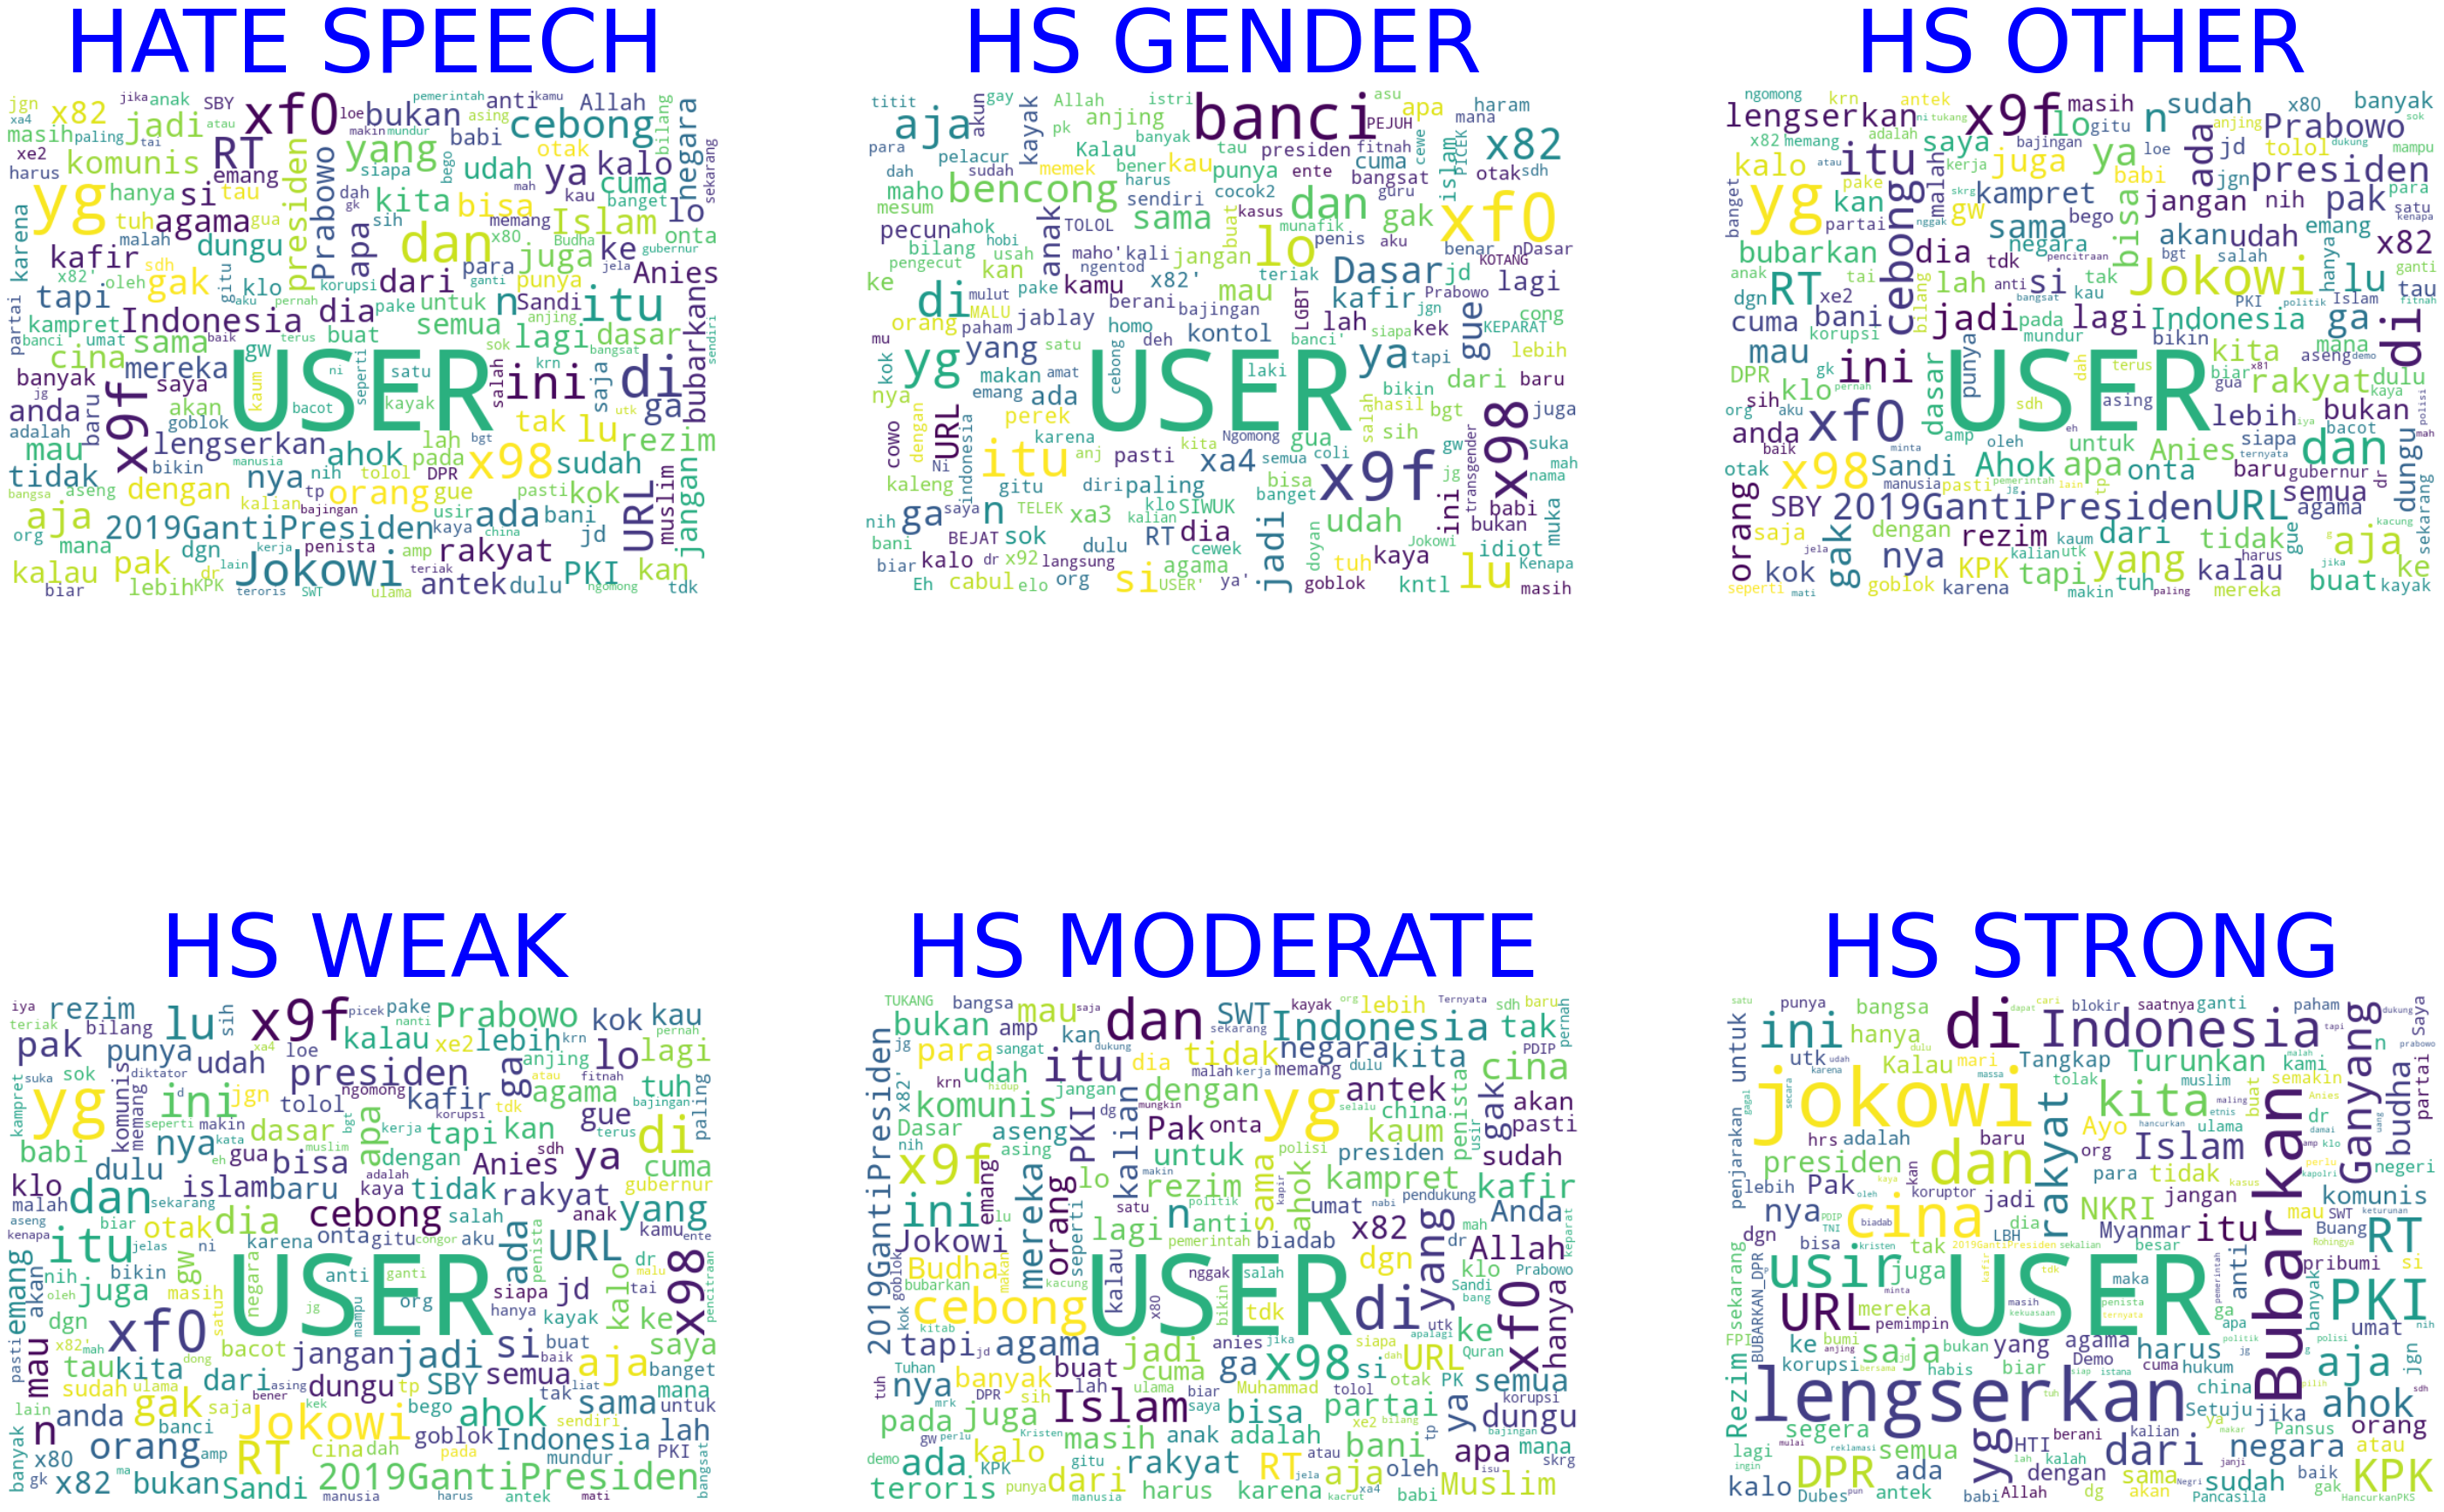

In [17]:
plt.figure(figsize=(50,35))
plt.subplot(2,3,1)
subset = df[df.HS==1]
text=subset.Tweet.values
words =" ".join(text)
wordcloud = WordCloud(width=700, height=500, random_state=21, max_font_size=110, collocations = False, background_color = 'white').generate(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('HATE SPEECH', fontdict = {'fontsize' : 100}, color = 'blue')

plt.subplot(2,3,2)
subset= df[df.HS_Gender==1]
text=subset.Tweet.values
words =" ".join(text)
wordcloud = WordCloud(width=700, height=500, random_state=21, max_font_size=110, collocations = False, background_color = 'white').generate(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('HS GENDER', fontdict = {'fontsize' : 100}, color = 'blue')

plt.subplot(2,3,3)
subset=df[df.HS_Other==1]
text=subset.Tweet.values
words =" ".join(text)
wordcloud = WordCloud(width=700, height=500, random_state=21, max_font_size=110, collocations = False, background_color = 'white').generate(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('HS OTHER', fontdict = {'fontsize' : 100}, color = 'blue')

plt.subplot(2,3,4)
subset=df[df.HS_Weak==1]
text=subset.Tweet.values
words =" ".join(text)
wordcloud = WordCloud(width=700, height=500, random_state=21, max_font_size=110, collocations = False, background_color = 'white').generate(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('HS WEAK', fontdict = {'fontsize' : 100}, color = 'blue')

plt.subplot(2,3,5)
subset=df[df.HS_Moderate==1]
text=subset.Tweet.values
words =" ".join(text)
wordcloud = WordCloud(width=700, height=500, random_state=21, max_font_size=110, collocations = False, background_color = 'white').generate(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('HS MODERATE', fontdict = {'fontsize' : 100}, color = 'blue')

plt.subplot(2,3,6)
subset=df[df.HS_Strong==1]
text=subset.Tweet.values
words =" ".join(text)
wordcloud = WordCloud(width=700, height=500, random_state=21, max_font_size=110, collocations = False, background_color = 'white').generate(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('HS STRONG', fontdict = {'fontsize' : 100}, color = 'blue')

<AxesSubplot:>

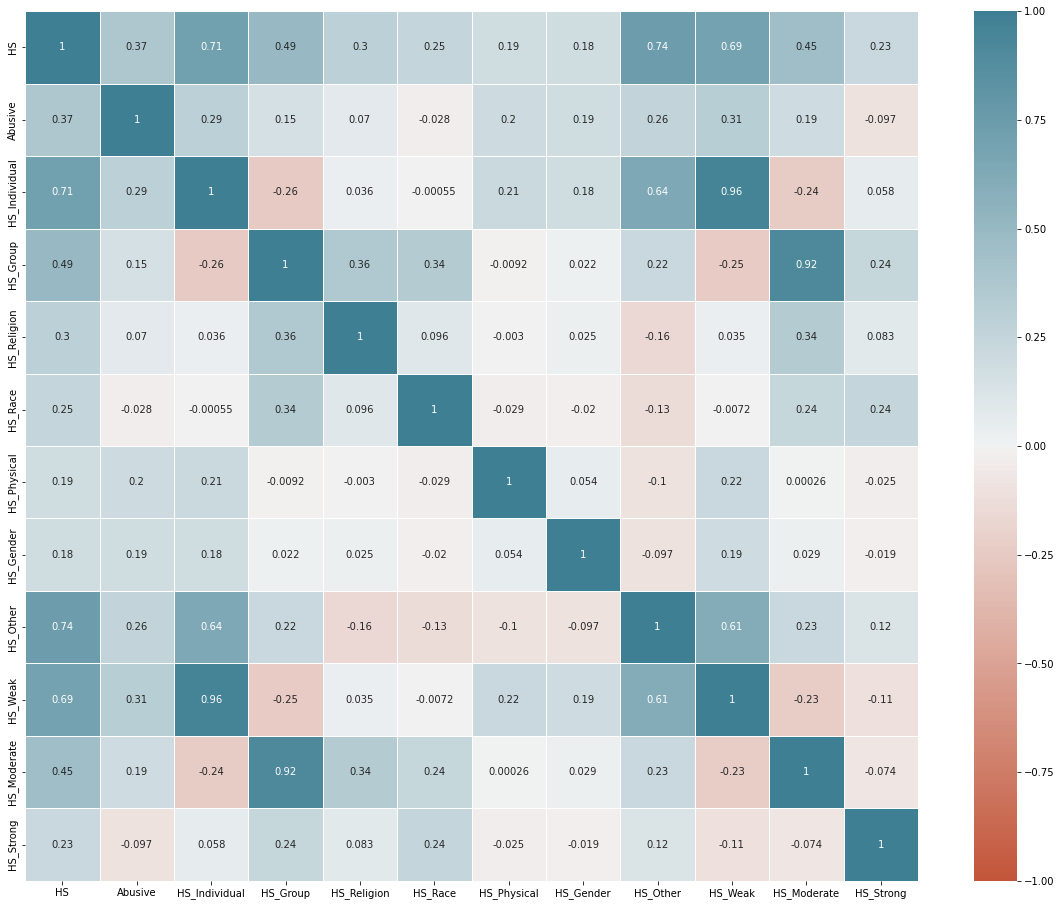

In [18]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(),vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True, linewidths=.5)

C:\Users\ASUS\anaconda33\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


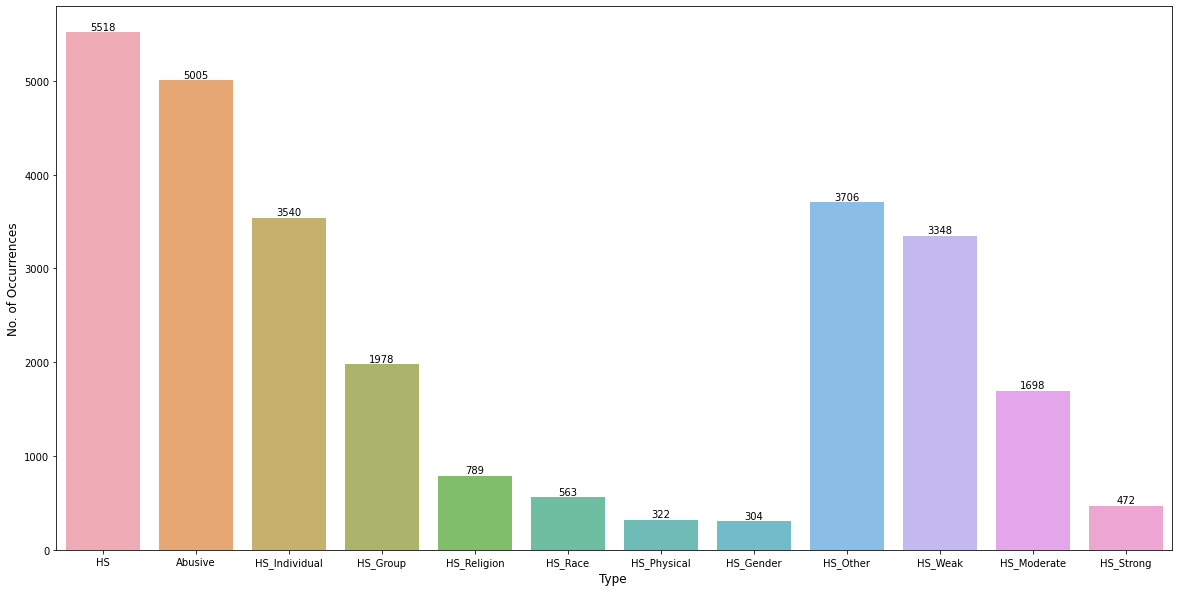

In [132]:
dg = df.drop(['Tweet', 'parse_tweet', 'tweet_token'], axis = 1)
data_count=dg.iloc[:,:].sum()
plt.figure(figsize=(20,10))

# Plot a bar chart using the index (category values) and the count of each category. alpha = 0.8 to make the bars more translucent
ax = sns.barplot(data_count.index, data_count.values, alpha=0.8)

plt.ylabel('No. of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)

#adding the text labels for each bar
rects = ax.patches
labels = data_count.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

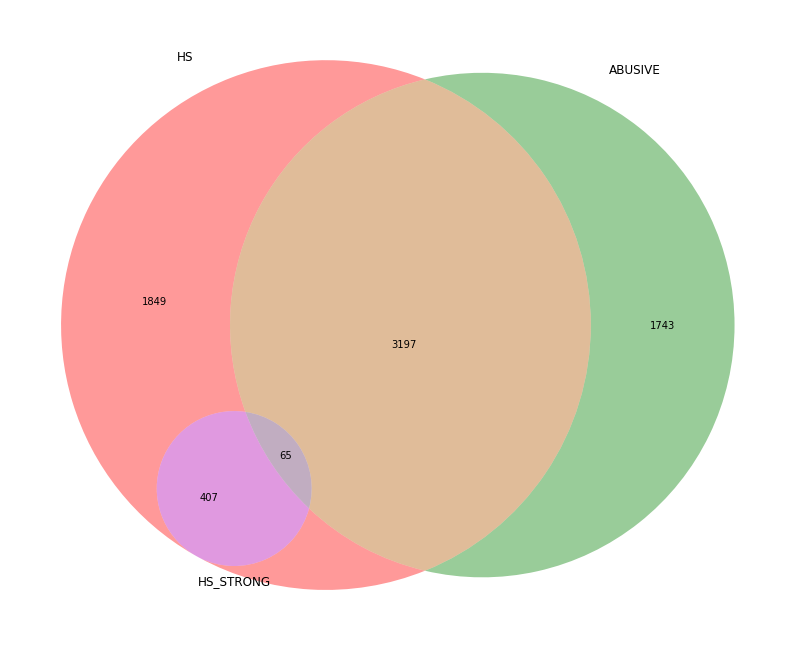

In [150]:
from matplotlib_venn import venn2
from matplotlib_venn import venn3
t = df[(df['HS'] == 1) & (df['Abusive'] == 0) & (df['HS_Strong'] == 0)].shape[0]
i = df[(df['HS'] == 0) & (df['Abusive'] == 1) & (df['HS_Strong'] == 0)].shape[0]
o = df[(df['HS'] == 0) & (df['Abusive'] == 0) & (df['HS_Strong'] == 1)].shape[0]

t_i = df[(df['HS'] == 1) & (df['Abusive'] == 1) & (df['HS_Strong'] == 0)].shape[0]
t_o = df[(df['HS'] == 1) & (df['Abusive'] == 0) & (df['HS_Strong'] == 1)].shape[0]
i_o = df[(df['HS'] == 0) & (df['Abusive'] == 1) & (df['HS_Strong'] == 1)].shape[0]

t_i_o = df[(df['HS'] == 1) & (df['Abusive'] == 1) & (df['HS_Strong'] == 1)].shape[0]


# Make the diagram
plt.figure(figsize=(14, 14))
venn3(subsets = (t, i, t_i, o, t_o, i_o, t_i_o), 
      set_labels=('HS', 'ABUSIVE', 'HS_STRONG'))
plt.show()

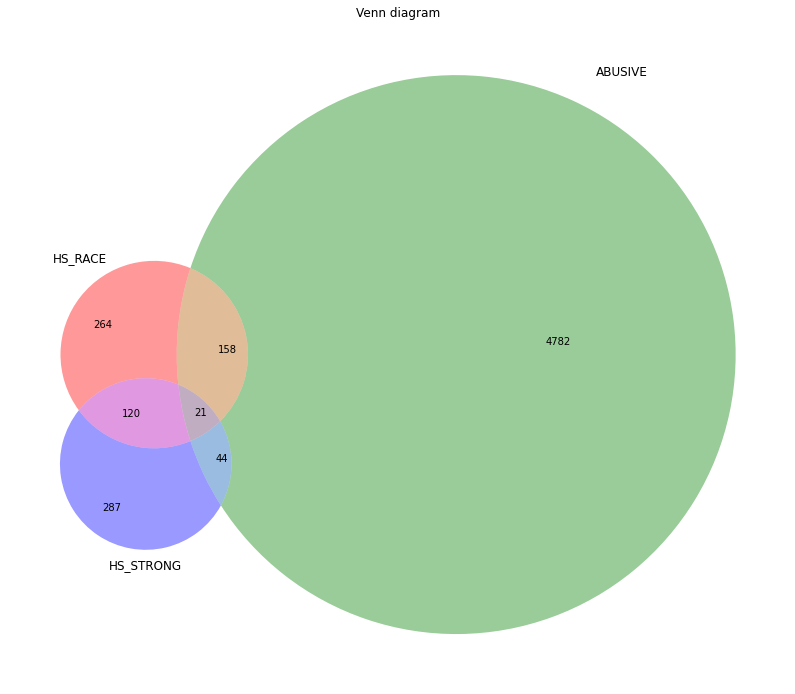

In [119]:
t = df[(df['HS_Race'] == 1) & (df['Abusive'] == 0) & (df['HS_Strong'] == 0)].shape[0]
i = df[(df['HS_Race'] == 0) & (df['Abusive'] == 1) & (df['HS_Strong'] == 0)].shape[0]
o = df[(df['HS_Race'] == 0) & (df['Abusive'] == 0) & (df['HS_Strong'] == 1)].shape[0]

t_i = df[(df['HS_Race'] == 1) & (df['Abusive'] == 1) & (df['HS_Strong'] == 0)].shape[0]
t_o = df[(df['HS_Race'] == 1) & (df['Abusive'] == 0) & (df['HS_Strong'] == 1)].shape[0]
i_o = df[(df['HS_Race'] == 0) & (df['Abusive'] == 1) & (df['HS_Strong'] == 1)].shape[0]

t_i_o = df[(df['HS_Race'] == 1) & (df['Abusive'] == 1) & (df['HS_Strong'] == 1)].shape[0]


# Make the diagram
plt.figure(figsize=(14, 14))
plt.title("Venn diagram")
venn3(subsets = (t, i, t_i, o, t_o, i_o, t_i_o), 
      set_labels=('HS_RACE', 'ABUSIVE', 'HS_STRONG'))
plt.show()

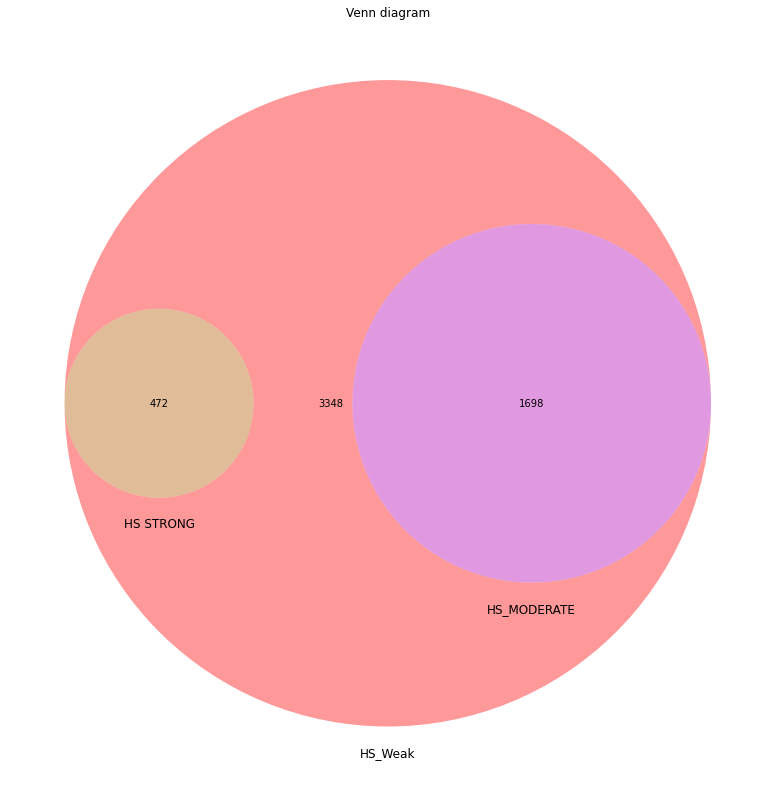

In [130]:
t = df[(df['HS'] == 1) & (df['HS_Strong'] == 0) & (df['HS_Moderate'] == 0)].shape[0]
i = df[(df['HS'] == 0) & (df['HS_Strong'] == 1) & (df['HS_Moderate'] == 0)].shape[0]
o = df[(df['HS'] == 0) & (df['HS_Strong'] == 0) & (df['HS_Moderate'] == 1)].shape[0]

t_i = df[(df['HS'] == 1) & (df['HS_Strong'] == 1) & (df['HS_Moderate'] == 0)].shape[0]
t_o = df[(df['HS'] == 1) & (df['HS_Strong'] == 0) & (df['HS_Moderate'] == 1)].shape[0]
i_o = df[(df['HS'] == 0) & (df['HS_Strong'] == 1) & (df['HS_Moderate'] == 1)].shape[0]

t_i_o = df[(df['HS'] == 1) & (df['HS_Strong'] == 1) & (df['HS_Moderate'] == 1)].shape[0]


# Make the diagram
plt.figure(figsize=(14, 14))
plt.title("Venn diagram")
venn3(subsets = (t, i, t_i, o, t_o, i_o, t_i_o), 
      set_labels=('HS_Weak', 'HS STRONG', 'HS_MODERATE'))
plt.show()

# FEATURE ENGINEERING

In [20]:
#df = df.drop('HS', 1)

In [192]:
df.drop_duplicates(inplace=True)

In [193]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()
alay_dict_map = dict(zip(alay_dict[0], alay_dict[1]))

In [194]:
def lowercase(text):
    return text.lower()

def remove_unnecessary_char(text):
    text = re.sub('\n',' ',str(text)) # Remove every '\n'
    text = re.sub('rt',' ',str(text)) # Remove every retweet symbol
    text = re.sub('user',' ',str(text)) # Remove every username
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',str(text)) # Remove every URL
    text = re.sub('  +', ' ', str(text)) # Remove extra spaces
    return text
    
def remove_nonaplhanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', str(text)) 
    text = re.sub(r'\d+', ' ', str(text))
    return text

def normalize_alay(text):
    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])
  
def remove_stopword(text):
    text = ' '.join(['' if word in id_stopword_dict.stopword.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = text.strip()
    return text

def stemming(text):
    return stemmer.stem(text)

In [195]:
def preprocess(text):
    text = lowercase(text)
    text = remove_nonaplhanumeric(text)
    text = remove_unnecessary_char(text)
    text = normalize_alay(text)
    text = stemming(text) 
    text = remove_stopword(text)
    return text

In [196]:
df['parse_tweet'] = df['Tweet'].apply(preprocess)

In [197]:
def wordToken(text):
    return word_tokenize(text)

# melakukan aplikasi tokenizing kalimat
df['tweet_token'] =df['parse_tweet'].apply(wordToken)

In [198]:
df.to_csv('proses.csv', encoding='utf-8-sig', index=False, header=True)

In [199]:
dffffffff = pd.read_csv('proses.csv', encoding='utf-8-sig')

In [200]:
df['parse_tweet'][9]

'enak lagi kalau sambil'

In [201]:
df['Tweet'][502]

"USER USER Maaf sebenarnya twiter pertama kali dbuat bukan buat orang bego'"

In [202]:
df['parse_tweet'][502]

'maaf benar twitter pe sama kali buat bukan buat orang'

In [203]:
#ter, xf, x, f, re, po, ais, amp, pe, anyaan, xe, nse, thpelautjkt, 

In [204]:
X = df['parse_tweet'].values
y = df[['HS','Abusive' ,'HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race', 'HS_Physical', 
            'HS_Gender' ,'HS_Other' ,'HS_Weak', 'HS_Moderate' ,'HS_Strong']].values

In [205]:
dgg = ['HS','Abusive' ,'HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race', 'HS_Physical', 
            'HS_Gender' ,'HS_Other' ,'HS_Weak', 'HS_Moderate' ,'HS_Strong']

In [206]:
vocabulary = set()

for tweet in df.tweet_token:
    for word in tweet:
        if word not in vocabulary:
            vocabulary.add(word)

vocab_length = len(vocabulary)

In [207]:
vocab_length

12971

In [208]:
max_seq_length = 0
for tweet in df.tweet_token:
    if len(tweet) > max_seq_length:
        max_seq_length = len(tweet)

In [209]:
max_seq_length

142

In [210]:
# from tensorflow.keras.preprocessing import text, sequence
# tokenizer = Tokenizer(num_words = vocab_length, oov_token="<OOV>", filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
# def pipeline(train):
#     tokenizer.fit_on_texts(train) # fit tokenizer to our training text data
#     x_train_x = tokenizer.texts_to_sequences(train)
#     x_hasil = pad_sequences(x_train_x, maxlen=max_seq_length, padding='post', truncating='post')
#     return x_hasil

In [211]:
#X_transform = pipeline(X)

In [212]:
#X_transform

In [213]:
#word_index = tokenizer.word_index
#print('Found %s unique tokens.' % len(word_index))

In [214]:
y

array([[1, 1, 1, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 0, 0]], dtype=int64)

In [215]:
# x_train, x_test, train_labels, test_labels = train_test_split(X_transform, y, test_size=0.1, random_state=42)
# x_train, x_val, train_labels, validation_labels = train_test_split(x_train, train_labels, test_size=2/9, random_state=42)
# x_train.shape,  x_val.shape,x_test.shape

In [216]:
train_articles, test_articles, train_labels, test_labels = train_test_split(X, y, test_size=0.1, random_state=42)
train_articles, val_articles, train_labels, validation_labels = train_test_split(train_articles, train_labels, test_size=2/9, random_state=42)
print(train_articles.shape,  val_articles.shape,test_articles.shape)
train_labels.shape,  validation_labels.shape,test_labels.shape

(9130,) (2609,) (1305,)


((9130, 12), (2609, 12), (1305, 12))

In [217]:
vocab_length = vocab_length + 1
tokenizer = Tokenizer(num_words = vocab_length, oov_token="<OOV>", filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(list(train_articles) + list(val_articles) + list(test_articles))
x_train_x = tokenizer.texts_to_sequences(train_articles)
x_val_x = tokenizer.texts_to_sequences(val_articles)
x_test_x = tokenizer.texts_to_sequences(test_articles)

x_train = pad_sequences(x_train_x, maxlen=max_seq_length, padding='post', truncating='post')
x_val = pad_sequences(x_val_x, maxlen=max_seq_length, padding='post', truncating='post')
x_test = pad_sequences(x_test_x, maxlen=max_seq_length, padding='post', truncating='post')
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 12972 unique tokens.


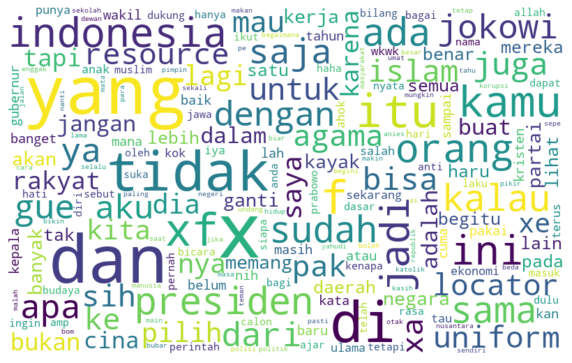

In [117]:
plt.figure(figsize=(10, 7))
text=df.parse_tweet.values
words =" ".join(text)
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, collocations = False, background_color = 'white').generate(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig('biden_wc.png')
plt.show()

In [ ]:
subset=df[df.HS_Moderate==1]
text=subset.Tweet.values
words =" ".join(text)
wordcloud = WordCloud(width=700, height=500, random_state=21, max_font_size=110, collocations = False, background_color = 'white').generate(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('HS MODERATE', fontdict = {'fontsize' : 100}, color = 'blue')

In [196]:
import joblib
joblib.dump(tokenizer, 'newtokens.save')

['newtokens.save']

# MODEL BILSTM

In [232]:
keras.backend.clear_session()

In [233]:
embedding_dim = 128
model_clf = Sequential()
model_clf.add(tf.keras.layers.Embedding(input_dim=vocab_length, output_dim=embedding_dim, input_length=max_seq_length))
model_clf.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)))
model_clf.add(tf.keras.layers.Dropout(0.5))
model_clf.add(tf.keras.layers.Dense(embedding_dim, activation='tanh'))
model_clf.add(tf.keras.layers.Dropout(0.5))
model_clf.add(tf.keras.layers.Dense(embedding_dim, activation='tanh'))
model_clf.add(tf.keras.layers.Dropout(0.5))
model_clf.add(tf.keras.layers.Dense(12, activation='sigmoid'))
earlystop = EarlyStopping(monitor = 'val_loss', #Nilai yang dimonitor
                          mode='auto',
                          min_delta = 0, #Nilai mutlak dan merupakan perubahan minimum yang diperlukan sebelum kita berhenti
                          patience = 1, #Nomor epochs yang ditunggu sebelum berhenti 
                          verbose = 0,
                          restore_best_weights = True) #Ketika berhenti di weights yang terbaik
model_clf.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 142, 128)          1660416   
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               263168    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0

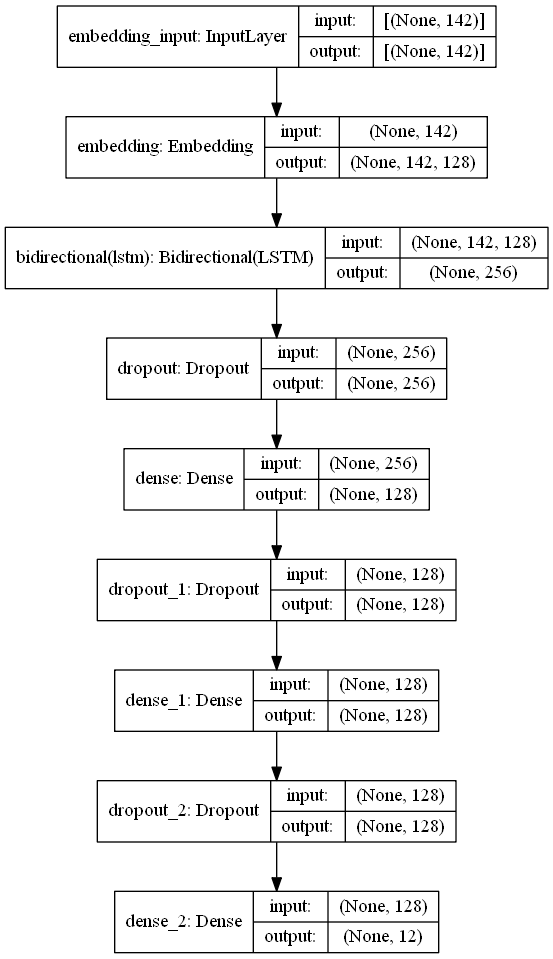

In [234]:
from keras.utils.vis_utils import plot_model
keras.utils.vis_utils.plot_model(model_clf, show_shapes=True)

In [235]:
model_clf.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
num_epochs = 60
history = model_clf.fit(x_train, train_labels, epochs=num_epochs, validation_data=(x_val, validation_labels),callbacks=[earlystop], verbose=2)

Epoch 1/60
286/286 - 65s - loss: 0.3835 - accuracy: 0.4267 - val_loss: 0.3077 - val_accuracy: 0.4691
Epoch 2/60
286/286 - 70s - loss: 0.2880 - accuracy: 0.4503 - val_loss: 0.2951 - val_accuracy: 0.4653
Epoch 3/60
286/286 - 72s - loss: 0.2370 - accuracy: 0.4157 - val_loss: 0.3002 - val_accuracy: 0.4247


In [236]:
model_clf.evaluate(x_train, train_labels)
model_clf.evaluate(x_val,validation_labels)
model_clf.evaluate(x_test,test_labels)

41/41 [==============================] - 3s 79ms/step - loss: 0.2951 - accuracy: 0.4552


[0.2950685918331146, 0.45517241954803467]

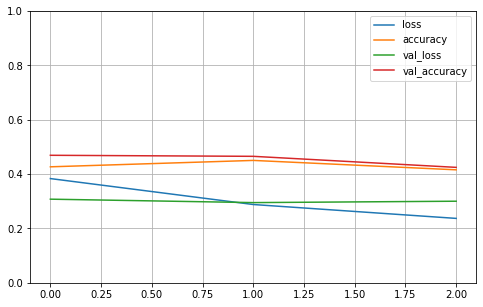

In [237]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [238]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

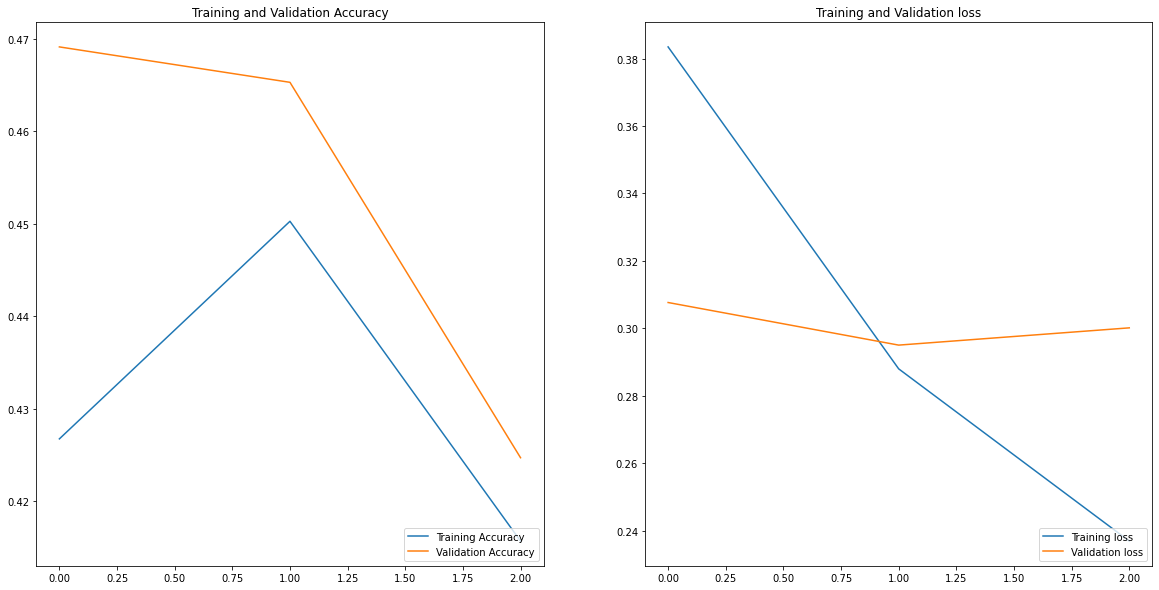

In [239]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(acc, label = 'Training Accuracy')
plt.plot(val_acc, label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(loss, label = 'Training loss')
plt.plot(val_loss, label = 'Validation loss')
plt.legend(loc='lower right')
plt.title('Training and Validation loss')

In [226]:
predict = np.round(model_clf.predict(x_test[0].reshape(1,-1)))
predict

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [227]:
print(classification_report([test_labels[0]], predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00         0
   macro avg       0.00      0.00      0.00         0
weighted avg       0.00      0.00      0.00         0
 samples avg       0.00      0.00      0.00         0



C:\Users\ASUS\anaconda33\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda33\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda33\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3

In [188]:
test_labels[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

# MODEL LSTM

In [105]:
keras.backend.clear_session()

In [106]:
embedding_dim = 128
model3 = Sequential()
model3.add(tf.keras.layers.Embedding(input_dim=vocab_length, output_dim=embedding_dim, input_length=max_seq_length))
model3.add(tf.keras.layers.LSTM(embedding_dim, activation="tanh"))
model3.add(tf.keras.layers.Dropout(0.5))
model3.add(tf.keras.layers.Dense(embedding_dim, activation='tanh'))
model3.add(tf.keras.layers.Dropout(0.5))
model3.add(tf.keras.layers.Dense(embedding_dim, activation='tanh'))
model3.add(tf.keras.layers.Dropout(0.5))
model3.add(tf.keras.layers.Dense(12, activation='sigmoid'))
earlystop = EarlyStopping(monitor = 'val_loss', #Nilai yang dimonitor
                          mode='min',
                          min_delta = 0, #Nilai mutlak dan merupakan perubahan minimum yang diperlukan sebelum kita berhenti
                          patience = 5, #Nomor epochs yang ditunggu sebelum berhenti 
                          verbose = 1,
                          restore_best_weights = True) #Ketika berhenti di weights yang terbaik
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 142, 128)          1660416   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0

In [107]:
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
num_epochs = 60
history3 = model3.fit(x_train, train_labels, epochs=num_epochs, validation_data=(x_val, validation_labels),callbacks=[earlystop], verbose=2)

Epoch 1/60
286/286 - 35s - loss: 0.4202 - accuracy: 0.4709 - val_loss: 0.3978 - val_accuracy: 0.8681
Epoch 2/60
286/286 - 40s - loss: 0.3994 - accuracy: 0.6240 - val_loss: 0.3960 - val_accuracy: 0.8681
Epoch 3/60
286/286 - 41s - loss: 0.3972 - accuracy: 0.6427 - val_loss: 0.3957 - val_accuracy: 0.8681
Epoch 4/60
286/286 - 42s - loss: 0.3959 - accuracy: 0.6908 - val_loss: 0.3982 - val_accuracy: 0.8681
Epoch 5/60
286/286 - 41s - loss: 0.3948 - accuracy: 0.6771 - val_loss: 0.3961 - val_accuracy: 0.8681
Epoch 6/60
286/286 - 41s - loss: 0.3943 - accuracy: 0.7220 - val_loss: 0.3965 - val_accuracy: 0.8681
Epoch 7/60
286/286 - 43s - loss: 0.3942 - accuracy: 0.7414 - val_loss: 0.3961 - val_accuracy: 0.8681
Epoch 8/60
286/286 - 41s - loss: 0.3935 - accuracy: 0.7417 - val_loss: 0.3964 - val_accuracy: 0.8681
Restoring model weights from the end of the best epoch.
Epoch 00008: early stopping


In [108]:
model3.evaluate(x_train, train_labels)
model3.evaluate(x_val,validation_labels)
model3.evaluate(x_test,test_labels)

41/41 [==============================] - 2s 43ms/step - loss: 0.3871 - accuracy: 0.8697


[0.3871321976184845, 0.8697317838668823]

Text(0.5, 1.0, 'Training and Validation loss')

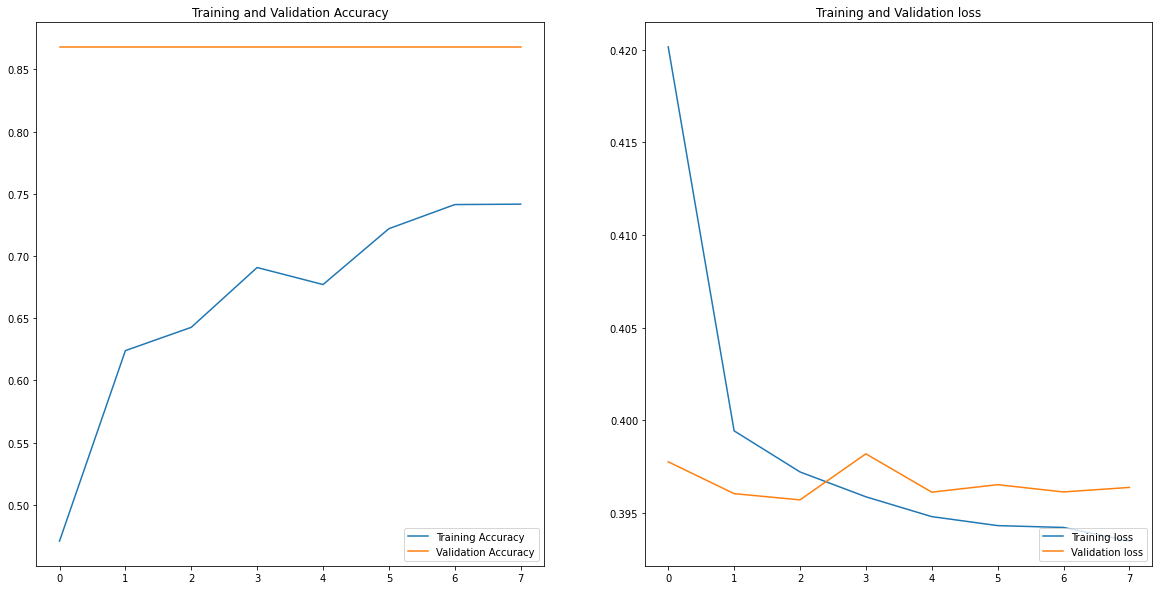

In [109]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

loss = history3.history['loss']
val_loss = history3.history['val_loss']
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(acc, label = 'Training Accuracy')
plt.plot(val_acc, label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(loss, label = 'Training loss')
plt.plot(val_loss, label = 'Validation loss')
plt.legend(loc='lower right')
plt.title('Training and Validation loss')

# MODEL CAMPURAN

In [110]:
keras.backend.clear_session()

In [111]:
model_campuran = Sequential()
model_campuran.add(tf.keras.layers.Embedding(input_dim=vocab_length, output_dim=embedding_dim, input_length=max_seq_length))
model_campuran.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)))
model_campuran.add(tf.keras.layers.Dropout(0.5))
model_campuran.add(tf.keras.layers.GlobalMaxPooling1D())
model_campuran.add(tf.keras.layers.Dropout(0.5))
model_campuran.add(tf.keras.layers.Dense(64, activation='tanh'))
model_campuran.add(tf.keras.layers.Dropout(0.5))
model_campuran.add(tf.keras.layers.Dense(12, activation='sigmoid'))
model_campuran.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 142, 128)          1660416   
_________________________________________________________________
bidirectional (Bidirectional (None, 142, 128)          98816     
_________________________________________________________________
dropout (Dropout)            (None, 142, 128)          0         
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0

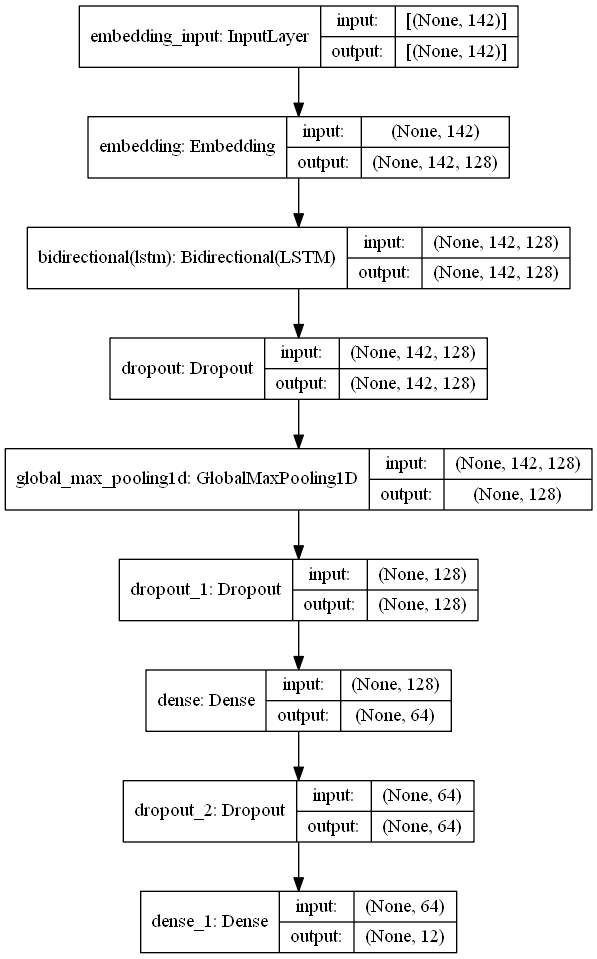

In [112]:
keras.utils.vis_utils.plot_model(model_campuran, show_shapes=True)

In [113]:
model_campuran.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
num_epochs = 60
history_campuran = model_campuran.fit(x_train, train_labels, epochs=num_epochs, validation_data=(x_val, validation_labels),callbacks=[earlystop], verbose=2)

Epoch 1/60
286/286 - 43s - loss: 0.4226 - accuracy: 0.3855 - val_loss: 0.3665 - val_accuracy: 0.5481
Epoch 2/60
286/286 - 41s - loss: 0.3293 - accuracy: 0.4774 - val_loss: 0.3164 - val_accuracy: 0.5424
Epoch 3/60
286/286 - 40s - loss: 0.2658 - accuracy: 0.4726 - val_loss: 0.3042 - val_accuracy: 0.5052
Epoch 4/60
286/286 - 41s - loss: 0.2289 - accuracy: 0.4451 - val_loss: 0.3003 - val_accuracy: 0.4458
Epoch 5/60
286/286 - 41s - loss: 0.1996 - accuracy: 0.4193 - val_loss: 0.3210 - val_accuracy: 0.4178
Epoch 6/60
286/286 - 40s - loss: 0.1786 - accuracy: 0.4081 - val_loss: 0.3153 - val_accuracy: 0.4220
Epoch 7/60
286/286 - 43s - loss: 0.1617 - accuracy: 0.4023 - val_loss: 0.3142 - val_accuracy: 0.4120
Epoch 8/60
286/286 - 43s - loss: 0.1462 - accuracy: 0.3905 - val_loss: 0.3326 - val_accuracy: 0.3729
Epoch 9/60
286/286 - 43s - loss: 0.1360 - accuracy: 0.3790 - val_loss: 0.3463 - val_accuracy: 0.3634
Restoring model weights from the end of the best epoch.
Epoch 00009: early stopping


In [114]:
model_campuran.evaluate(x_train, train_labels)
model_campuran.evaluate(x_val,validation_labels)
model_campuran.evaluate(x_test,test_labels)

41/41 [==============================] - 1s 36ms/step - loss: 0.3020 - accuracy: 0.4513


[0.3019627332687378, 0.45134100317955017]

Text(0.5, 1.0, 'Training and Validation loss')

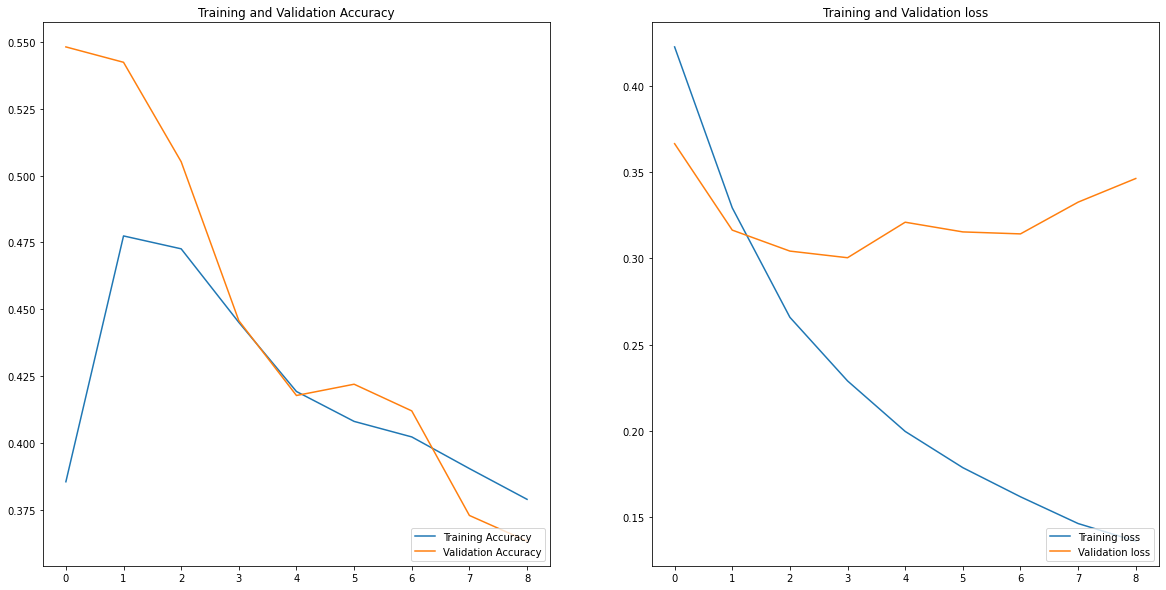

In [115]:
acc = history_campuran.history['accuracy']
val_acc = history_campuran.history['val_accuracy']

loss = history_campuran.history['loss']
val_loss = history_campuran.history['val_loss']
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(acc, label = 'Training Accuracy')
plt.plot(val_acc, label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(loss, label = 'Training loss')
plt.plot(val_loss, label = 'Validation loss')
plt.legend(loc='lower right')
plt.title('Training and Validation loss')

In [222]:
model_clf.save('newmodel.h5')
model_campuran.save('newmodel2.h5')

In [54]:
model3.save('newmodel3.h5')

# OUTPUT

In [65]:
filter_sizes = [1,2,3,5]
num_filters = 32

In [68]:
txt = {"NI MANUSIA APA ANJING MATI-MATIAN RELA JADI MURTADZ DEMI BABI AHOK KAFIR", 
       "bubarkan, pisahkan", 
       "gak bermanfaat lu, gaada yang nemenin tuh"}
padded = pipeline(txt)
y_predict2 = model_clf.predict(padded)
y_pred = (y_predict2 > thresholds).astype(int)
print(txt)
print('Kategori diatas termasuk:', y_pred)

{'bubarkan, pisahkan', 'keren, gokil', 'gak bermanfaat lu, gaada yang nemenin tuh'}
Kategori diatas termasuk: [[0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]


In [200]:
padded

array([[   1,   28,  372,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [6480,    1, 1836,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [ 428,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0

In [201]:
text_jelek =  pd.DataFrame(txt)
prediksi = pd.DataFrame(y_pred)

In [202]:
text_jelek.rename(columns={0: "Tweet"}, inplace=True)

In [203]:
prediksi.rename(columns={
    0: "Hate Speech",
    1: "Abusive Words",
    2: "Hate Speech",
    3: "Hate Speech",
    4: "Hate Speech",
    5: "Hate Speech",
    6: "Hate Speech",
    7: "Hate Speech",
    8: "Hate Speech",
    9: "Hate Speech",
    10: "Hate Speech",
    11: "Hate SpeechL",
    12: "Hate Speech"

},
                inplace=True)

In [204]:
pd.concat([text_jelek, prediksi], axis=1)

Tweet  Hate Speech  Abusive Words  Hate Speech  Hate Speech  \
0   alay banget aneh            1              0            0            0   
1  gak bermanfaat lu            1              0            0            0   
2       keren, gokil            1              0            0            0   

   Hate Speech  Hate Speech  Hate Speech  Hate Speech  Hate Speech  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   

   Hate Speech  Hate Speech  
0            0            0  
1            0            0  
2            0            0

In [141]:
model_clf = keras.models.load_model("newmodel.h5")

# LANJUTANNYA

In [228]:
x_test_x = tokenizer.texts_to_sequences(df.parse_tweet.values)
padded = pad_sequences(x_test_x, maxlen=max_seq_length, padding='post', truncating='post')
y_predict2 = np.round(model_clf.predict(padded))
print(classification_report(df.drop(columns=['Tweet','parse_tweet','tweet_token']), y_predict2, target_names=dgg))
#y_predict2 = (y_predict2 > 0.5).astype(int)
test_ids = df.parse_tweet.values
test_ids = test_ids.reshape(-1, 1)
sub_df = pd.DataFrame(y_predict2, columns=df.columns[1:13])
sub_df['id'] = test_ids
sub_df

               precision    recall  f1-score   support

           HS       0.85      0.88      0.87      5518
      Abusive       0.66      0.62      0.64      5005
HS_Individual       0.77      0.75      0.76      3540
     HS_Group       0.82      0.57      0.67      1978
  HS_Religion       0.44      0.04      0.07       789
      HS_Race       0.79      0.11      0.20       563
  HS_Physical       0.00      0.00      0.00       322
    HS_Gender       0.00      0.00      0.00       304
     HS_Other       0.70      0.70      0.70      3706
      HS_Weak       0.76      0.71      0.73      3348
  HS_Moderate       0.64      0.35      0.45      1698
    HS_Strong       0.94      0.03      0.06       472

    micro avg       0.75      0.64      0.69     27243
    macro avg       0.61      0.40      0.43     27243
 weighted avg       0.73      0.64      0.66     27243
  samples avg       0.39      0.34      0.34     27243



C:\Users\ASUS\anaconda33\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda33\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda33\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


HS  Abusive  HS_Individual  HS_Group  HS_Religion  HS_Race  \
0      0.0      1.0            0.0       0.0          0.0      0.0   
1      0.0      1.0            0.0       0.0          0.0      0.0   
2      0.0      0.0            0.0       0.0          0.0      0.0   
3      0.0      0.0            0.0       0.0          0.0      0.0   
4      1.0      0.0            0.0       0.0          0.0      0.0   
...    ...      ...            ...       ...          ...      ...   
13039  1.0      1.0            1.0       0.0          0.0      0.0   
13040  0.0      0.0            0.0       0.0          0.0      0.0   
13041  0.0      0.0            0.0       0.0          0.0      0.0   
13042  0.0      0.0            0.0       0.0          0.0      0.0   
13043  0.0      1.0            1.0       0.0          0.0      0.0   

       HS_Physical  HS_Gender  HS_Other  HS_Weak  HS_Moderate  HS_Strong  \
0              0.0        0.0       0.0      0.0          0.0        0.0   
1              0.0        0.0       0.0      0.0          0.0        0.0   
2              0.0        0.0       0.0      0.0          0.0        0.0   
3              0.0        0.0       0.0      0.0          0.0        0.0   
4              0.0        0.0       1.0      0.0          0.0        0.0   
...            ...        ...       ...      ...          ...        ...   
13039          0.0        0.0       1.0      1.0          0.0        0.0   
13040          0.0        0.0       0.0      0.0          0.0        0.0   
13041          0.0        0.0       0.0      0.0          0.0        0.0   
13042          0.0        0.0       0.0      0.0          0.0        0.0   
13043          0.0        0.0       0.0      1.0          0.0        0.0   

                                                      id  
0      di saat semua cowok usaha lacak perhati gue ka...  
1      siapa yang telat beri tau kamu gue gaul dengan...  
2      kadang aku pikir kenapa aku tetap percaya pada...  
3      aku itu aku dan ku tau mata tapi lihat dari ma...  
4            kaum sudah lihat dari awal tambah lagi haha  
...                                                  ...  
13039           jangan asal bicara ndasmu kamu yang kate  
13040                                    kasur mana enak  
13041    hati hati tidak dan lagi bosan duh xf x f x xaa  
13042  bom yang real mudah deteksi bom yang kubur sua...  
13043              mana situ beri itu cuma foto ya kutil  

[13044 rows x 13 columns]

In [229]:
df.parse_tweet.values

array(['di saat semua cowok usaha lacak perhati gue kamu lantas remeh perhati yang gue kasih khusus ke kamu basic kamu cowok',
       'siapa yang telat beri tau kamu gue gaul dengan cigax jifla cal sama siapa itu licew juga',
       'kadang aku pikir kenapa aku tetap percaya pada tuhan padahal aku selalu jatuh kali kali kadang aku rasa tuhan itu tinggal aku sendiri ketika orang tua rencana pisah ketika kakak lebih pilih jadi kristen ketika aku anak ter',
       ..., 'hati hati tidak dan lagi bosan duh xf x f x xaa',
       'bom yang real mudah deteksi bom yang kubur suatu saat lebih dahsyat ledak itu di sebut revolusi jiwa',
       'mana situ beri itu cuma foto ya kutil'], dtype=object)

In [230]:
df

Tweet  HS  Abusive  \
0      - disaat semua cowok berusaha melacak perhatia...   1        1   
1      RT USER: USER siapa yang telat ngasih tau elu?...   0        1   
2      41. Kadang aku berfikir, kenapa aku tetap perc...   0        0   
3      USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   0        0   
4      USER USER Kaum cebong kapir udah keliatan dong...   1        1   
...                                                  ...  ..      ...   
13164  USER jangan asal ngomong ndasmu. congor lu yg ...   1        1   
13165                       USER Kasur mana enak kunyuk'   0        1   
13166  USER Hati hati bisu :( .g\n\nlagi bosan huft \...   0        0   
13167  USER USER USER USER Bom yang real mudah terdet...   0        0   
13168  USER Mana situ ngasih(": itu cuma foto ya kuti...   1        1   

       HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0                  1         0            0        0            0          0   
1                  0         0            0        0            0          0   
2                  0         0            0        0            0          0   
3                  0         0            0        0            0          0   
4                  0         1            1        0            0          0   
...              ...       ...          ...      ...          ...        ...   
13164              1         0            0        0            1          0   
13165              0         0            0        0            0          0   
13166              0         0            0        0            0          0   
13167              0         0            0        0            0          0   
13168              1         0            0        0            0          0   

       HS_Other  HS_Weak  HS_Moderate  HS_Strong  \
0             1        1            0          0   
1             0        0            0          0   
2             0        0            0          0   
3             0        0            0          0   
4             0        0            1          0   
...         ...      ...          ...        ...   
13164         0        1            0          0   
13165         0        0            0          0   
13166         0        0            0          0   
13167         0        0            0          0   
13168         1        1            0          0   

                                             parse_tweet  \
0      di saat semua cowok usaha lacak perhati gue ka...   
1      siapa yang telat beri tau kamu gue gaul dengan...   
2      kadang aku pikir kenapa aku tetap percaya pada...   
3      aku itu aku dan ku tau mata tapi lihat dari ma...   
4            kaum sudah lihat dari awal tambah lagi haha   
...                                                  ...   
13164           jangan asal bicara ndasmu kamu yang kate   
13165                                    kasur mana enak   
13166    hati hati tidak dan lagi bosan duh xf x f x xaa   
13167  bom yang real mudah deteksi bom yang kubur sua...   
13168              mana situ beri itu cuma foto ya kutil   

                                             tweet_token  
0      [di, saat, semua, cowok, usaha, lacak, perhati...  
1      [siapa, yang, telat, beri, tau, kamu, gue, gau...  
2      [kadang, aku, pikir, kenapa, aku, tetap, perca...  
3      [aku, itu, aku, dan, ku, tau, mata, tapi, liha...  
4      [kaum, sudah, lihat, dari, awal, tambah, lagi,...  
...                                                  ...  
13164   [jangan, asal, bicara, ndasmu, kamu, yang, kate]  
13165                                [kasur, mana, enak]  
13166  [hati, hati, tidak, dan, lagi, bosan, duh, xf,...  
13167  [bom, yang, real, mudah, deteksi, bom, yang, k...  
13168     [mana, situ, beri, itu, cuma, foto, ya, kutil]  

[13044 rows x 15 columns]

Text(0.5, 1.0, 'HASIL PREDIKSI')

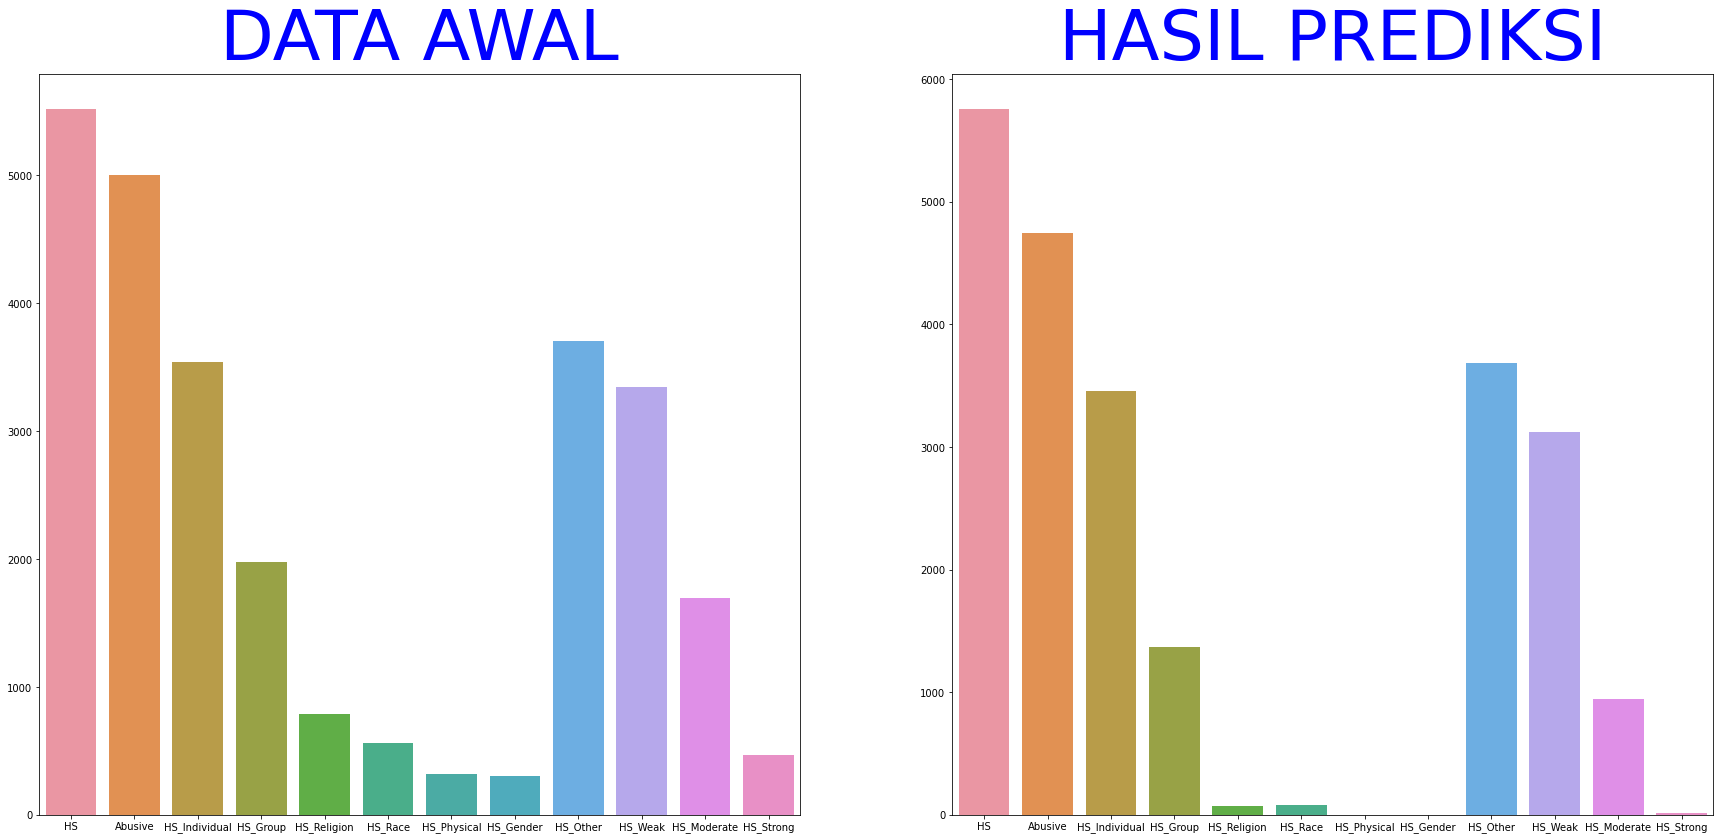

In [231]:
categories = ['HS','Abusive' ,'HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race', 'HS_Physical', 
            'HS_Gender' ,'HS_Other' ,'HS_Weak', 'HS_Moderate' ,'HS_Strong']

plt.figure(figsize=(30, 30)) 
plt.subplot(2,2,1)
sns.barplot(x=categories,y=df[categories].sum())
plt.title('DATA AWAL', fontdict = {'fontsize' : 70}, color = 'blue')

plt.subplot(2,2,2)
sns.barplot(x=categories,y=sub_df[categories].sum())
plt.title('HASIL PREDIKSI', fontdict = {'fontsize' : 70}, color = 'blue')

In [146]:
label_size0_val = []
label_size1_val = []

for i in df.columns[1:-2]:
    label_size0_val.append(len(df[df[i]==0]))
    label_size1_val.append(len(df[df[i]==1]))
    
label_size0_val_predict = []
label_size1_val_predict = []

for i in sub_df.columns[0:-1]:
    label_size0_val_predict.append(len(sub_df[sub_df[i]==0]))
    label_size1_val_predict.append(len(sub_df[sub_df[i]==1])) 
    
    
    
dat_anls_val = pd.DataFrame({
    'label' : df.columns[1:-2],
    'stats' : ["negative" for i in range(len(df.columns[1:-2]))],
    'jumlah' : label_size0_val
}).append(
    pd.DataFrame({
        'label' : df.columns[1:-2],
        'stats' : ["positive" for i in range(len(df.columns[1:-2]))],
        'jumlah' : label_size1_val
    })
)    

dat_anls_val_predict = pd.DataFrame({
    'label' : sub_df.columns[0:-1],
    'stats' : ["negative" for i in range(len(sub_df.columns[0:-1]))],
    'jumlah' : label_size0_val_predict
}).append(
    pd.DataFrame({
        'label' : sub_df.columns[0:-1],
        'stats' : ["positive" for i in range(len(sub_df.columns[0:-1]))],
        'jumlah' : label_size1_val_predict
    })
)

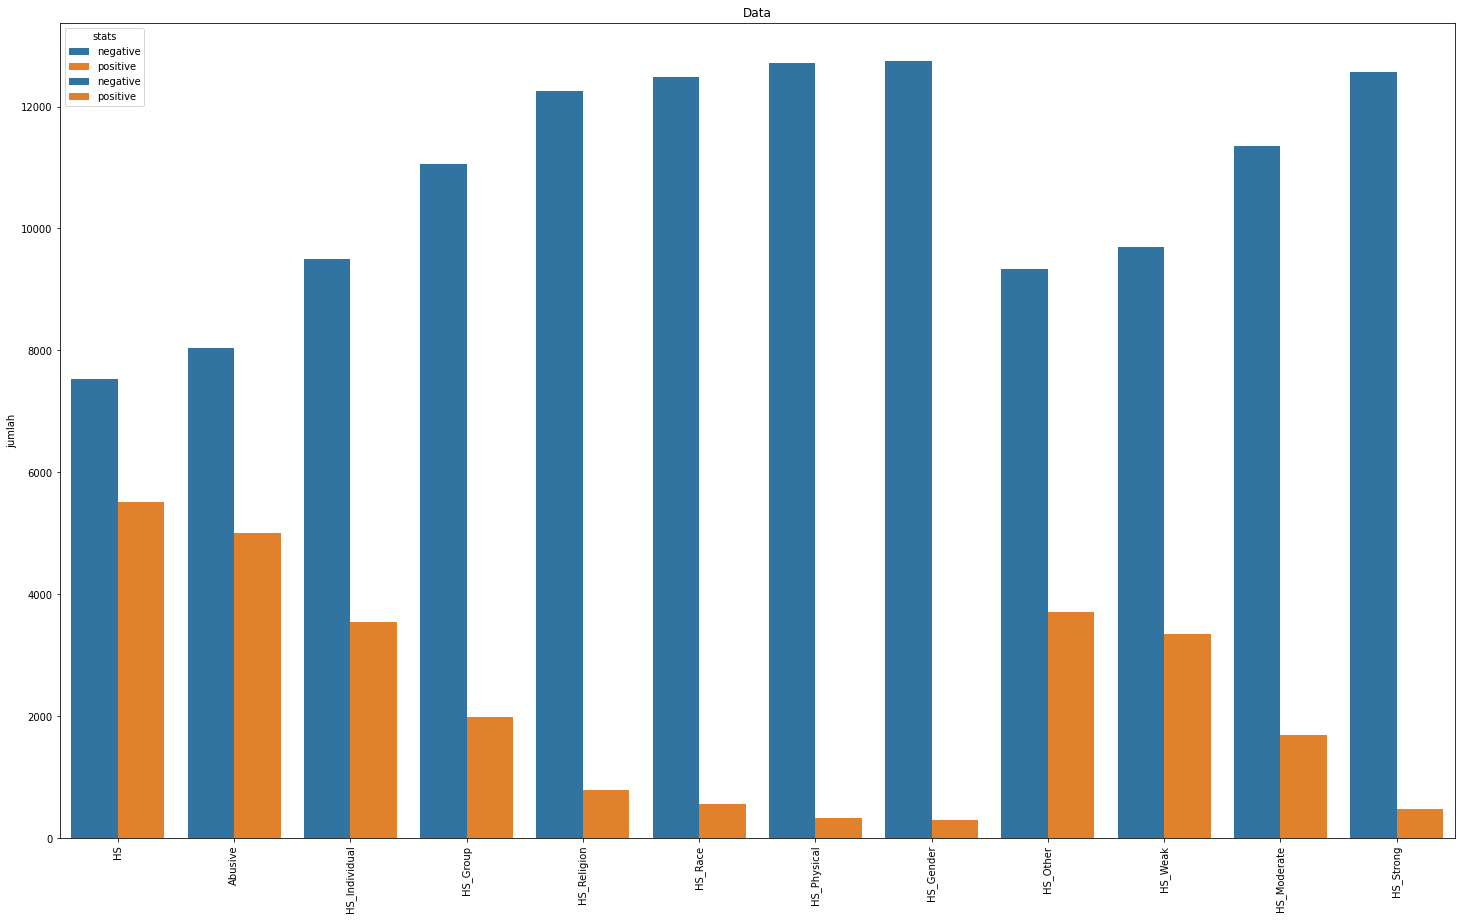

In [147]:
plt.figure(figsize=(25,15))
sns.barplot(x="label", y="jumlah",hue="stats", data=dat_anls_val).set_xticklabels(sns.barplot(x="label", y="jumlah",hue="stats", data=dat_anls_val).get_xticklabels(),rotation=90)
plt.title("Data")
plt.xlabel('')
plt.show()

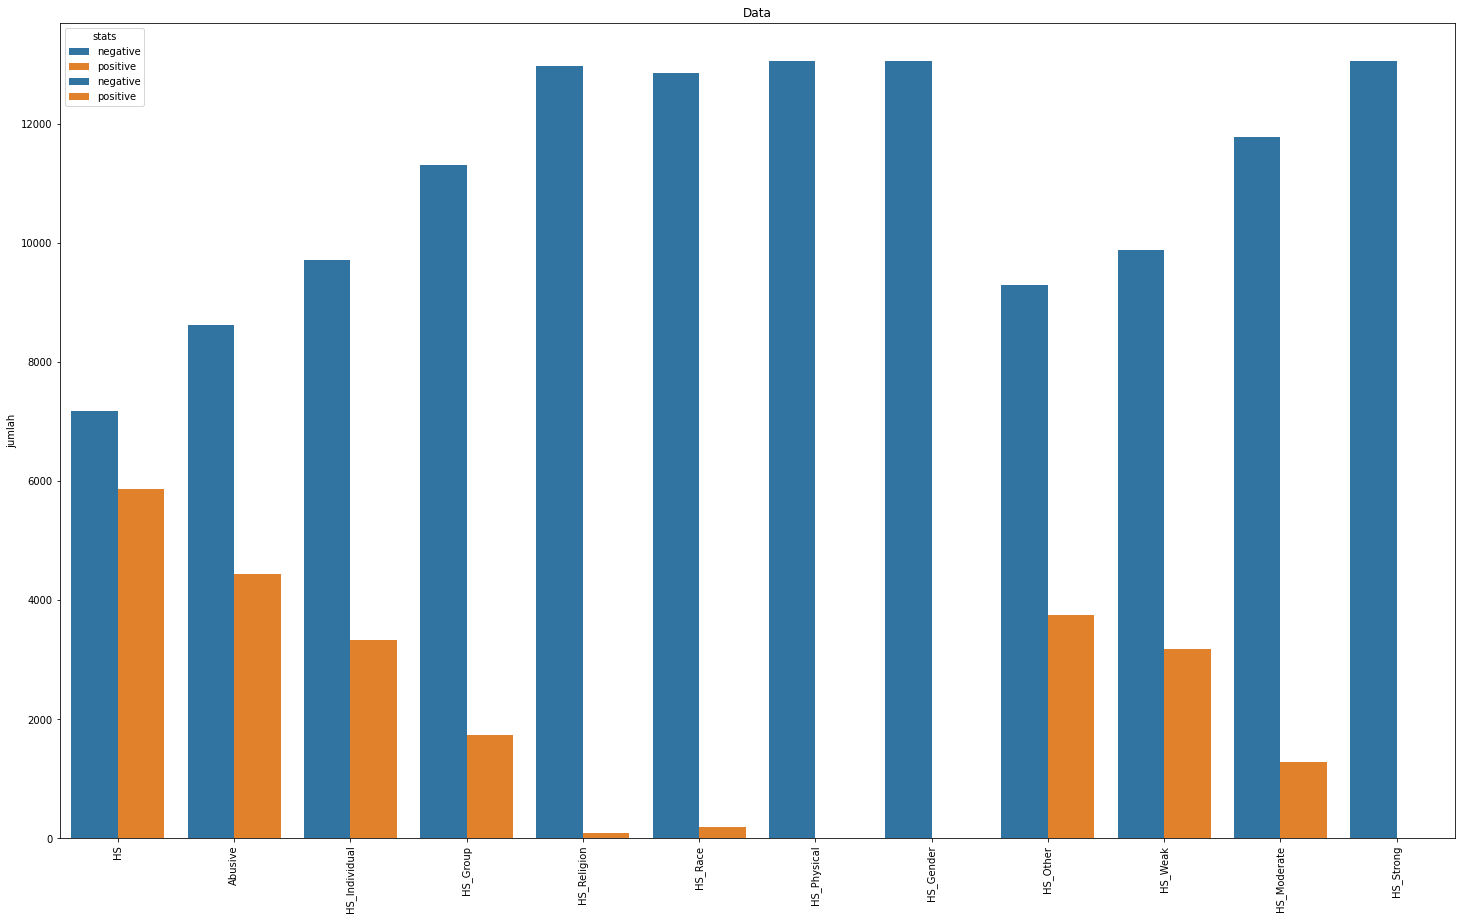

In [148]:
plt.figure(figsize=(25,15))
sns.barplot(x="label", y="jumlah",hue="stats", data=dat_anls_val_predict).set_xticklabels(sns.barplot(x="label", y="jumlah",hue="stats", data=dat_anls_val_predict).get_xticklabels(),rotation=90)
plt.title("Data")
plt.xlabel('')
plt.show()

In [149]:
pd.DataFrame({
    "TARGET" : df.columns[1:-2],
    "TRUE NEGATIVE (ASLI)" : dat_anls_val[dat_anls_val['stats'] == "negative"]["jumlah"].values,
    "TRUE POSITIVE (ASLI)" : dat_anls_val[dat_anls_val['stats'] == "positive"]["jumlah"].values,
    "TRUE NEGATIVE (PREDIKSI)" : dat_anls_val_predict[dat_anls_val_predict['stats'] == "negative"]["jumlah"].values,
    "TRUE POSTIVE (PREDIKSI)" : dat_anls_val_predict[dat_anls_val_predict['stats'] == "positive"]["jumlah"].values
})

TARGET  TRUE NEGATIVE (ASLI)  TRUE POSITIVE (ASLI)  \
0              HS                  7526                  5518   
1         Abusive                  8039                  5005   
2   HS_Individual                  9504                  3540   
3        HS_Group                 11066                  1978   
4     HS_Religion                 12255                   789   
5         HS_Race                 12481                   563   
6     HS_Physical                 12722                   322   
7       HS_Gender                 12740                   304   
8        HS_Other                  9338                  3706   
9         HS_Weak                  9696                  3348   
10    HS_Moderate                 11346                  1698   
11      HS_Strong                 12572                   472   

    TRUE NEGATIVE (PREDIKSI)  TRUE POSTIVE (PREDIKSI)  
0                       7175                     5869  
1                       8615                     4429  
2                       9710                     3334  
3                      11307                     1737  
4                      12961                       83  
5                      12853                      191  
6                      13043                        1  
7                      13043                        1  
8                       9295                     3749  
9                       9875                     3169  
10                     11767                     1277  
11                     13043                        1